In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Final Parameters (theta): [5027826.83877581  620090.29081112   88051.57662788  525336.77292203
  437405.21701801  284782.24943897]
Final Training Cost: 749258111362.1329
Final Validation Cost: 1066923708068.6681


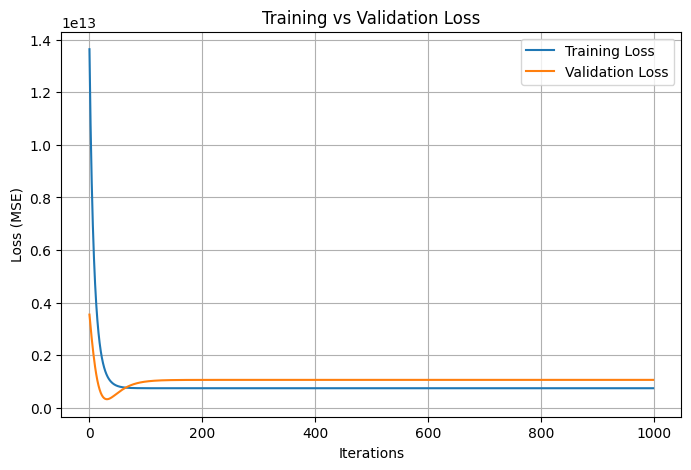

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Courses/ML/Housing.csv"
data = pd.read_csv(file_path)

features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target = "price"

X = data[features].values
Y = data[target].values

m = len(Y)
X_0 = np.ones((m, 1))
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_1 = (X - X_mean) / X_std
X = np.hstack((X_0, X_1))

# Train/Validation Split

train_size = int(0.8 * m)
X_train, X_val = X[:train_size], X[train_size:]
Y_train, Y_val = Y[:train_size], Y[train_size:]

# Cost Function

def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    errors = predictions - Y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost


# Gradient Descent Function

learning_rate = 0.05

def gradient_descent(X, Y, X_val, Y_val, theta, learning_rate, iterations=1000):
    m = len(Y)
    train_costs = []
    val_costs = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - Y
        gradients = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradients

        # track costs
        train_costs.append(compute_cost(X, Y, theta))
        val_costs.append(compute_cost(X_val, Y_val, theta))

    return theta, train_costs, val_costs

theta_init = np.zeros(X.shape[1])
theta, train_losses, val_losses = gradient_descent(X_train, Y_train, X_val, Y_val, theta_init, learning_rate, iterations=1000)

print("Final Parameters (theta):", theta)
print("Final Training Cost:", train_losses[-1])
print("Final Validation Cost:", val_losses[-1])

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

Final Parameters (theta):
[3070686.33091278  582135.57577389  255262.8325386   887384.83496584
  605451.27195574  779249.38602864  407536.84565769  301914.90064864
  900932.59202932  926137.25722877  281351.04360546  663434.89627441]
Final Training Cost: 642599358788.0961
Final Validation Cost: 661389096283.1327


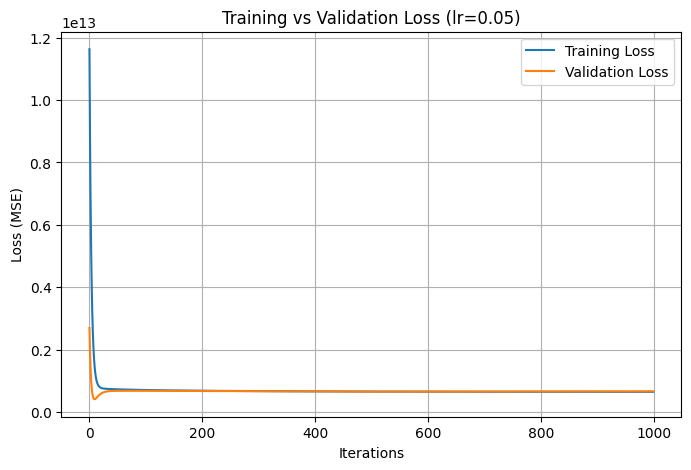

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Courses/ML/Housing.csv"
data = pd.read_csv(file_path)

features = ["area", "bedrooms", "bathrooms", "stories",
            "mainroad", "guestroom", "basement",
            "hotwaterheating", "airconditioning",
            "parking", "prefarea"]
target = "price"

binary_cols = ["mainroad", "guestroom", "basement",
               "hotwaterheating", "airconditioning", "prefarea"]
for col in binary_cols:
    data[col] = data[col].map({"yes": 1, "no": 0})

X = data[features].values
Y = data[target].values

# Identify numeric columns by index
# area, bedrooms, bathrooms, stories, parking
numeric_idx = [0,1,2,3,9]
X_mean = X[:, numeric_idx].mean(axis=0)
X_std = X[:, numeric_idx].std(axis=0)
X[:, numeric_idx] = (X[:, numeric_idx] - X_mean) / X_std

m = len(Y)
X_0 = np.ones((m, 1))
X = np.hstack((X_0, X))

# Train/Validation Split

train_size = int(0.8 * m)
X_train, X_val = X[:train_size], X[train_size:]
Y_train, Y_val = Y[:train_size], Y[train_size:]

def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    errors = predictions - Y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# Gradient Descent Function

def gradient_descent(X, Y, X_val, Y_val, theta, lr=0.05, iterations=1000):
    m = len(Y)
    train_costs, val_costs = [], []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - Y
        gradients = (1/m) * X.T.dot(errors)
        theta -= lr * gradients

        train_costs.append(compute_cost(X, Y, theta))
        val_costs.append(compute_cost(X_val, Y_val, theta))

    return theta, train_costs, val_costs

# Train model with chosen learning rate

theta_init = np.zeros(X.shape[1])
learning_rate = 0.05
iterations = 1000

theta, train_losses, val_losses = gradient_descent(X_train, Y_train, X_val, Y_val,
                                                   theta_init, lr=learning_rate, iterations=iterations)

print("Final Parameters (theta):")
print(theta)
print("Final Training Cost:", train_losses[-1])
print("Final Validation Cost:", val_losses[-1])

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title(f"Training vs Validation Loss (lr={learning_rate})")
plt.legend()
plt.grid(True)
plt.show()
